# Spectral Curvature

<h5 style="text-align:right; margin-right:15px"> 2023-07-29 16:53</h5>

Read 6699 source entries from `files/fermi_sources_v2.csv`, selected 6496 with criteria 'delta<0.25 & curvature<2.1'

Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries
Loaded Fermi 4FGL gll_psc_v32.fit: 7195 entries
Loaded UW model uw1410: 11786 entries


## Curvature distributions 
The spectral curvature is defined as the negative of the second derivative of the SED distribution
in log-log space. For the common log-parabola (LP) spectral function it is $2\beta$. Pulsars are fit
with a power-law exponential form (PLEC). For these we evaluate the curvature at the reference energy. 

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f41bf74f8e0>
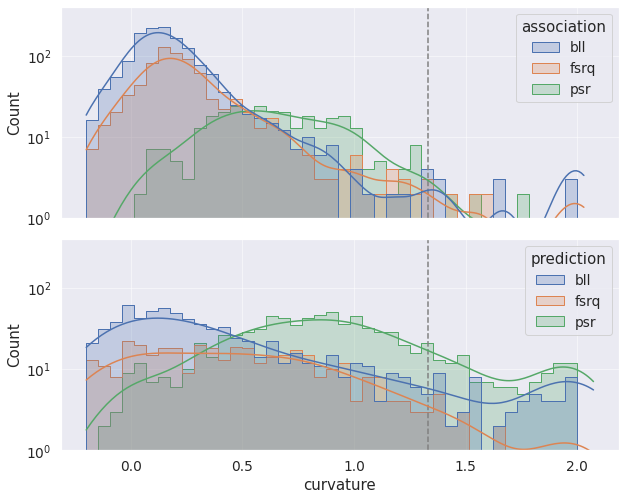

An initial assumption might be that unassociated sources are one of the three major types, 
which account for 95% of all associated sources. However, the shapes of the predicted distributions 
are not consistent with a simple linear combination of the associated counterparts. This is 
dramatically true for the pulsars, which we expect to be limited by the physical bound of 4/3.

## Curvature measurment details
### Role of measurement error
THere are two issues to consider:
1. The unassociated sources tend to be weaker, unassociated perhaps because they were harder to detect 
in other wavelengths--this means that statistical errors for spectral details are larger. For pulsars, larger error 
circles make radio searches more difficult.
2. Higher curvatures have intrinsically larger errors

### UW measurments
        

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f41aedf2950>
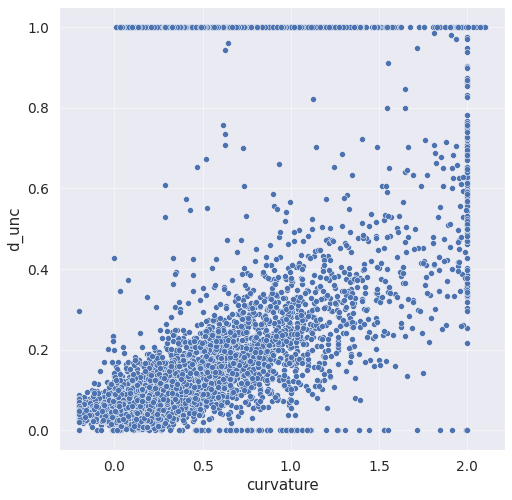

The UW fit procedure optimized curvatures independently for each source, limiting the value to 2. 
There were some sources for which the fit was not done, or apparently failed.
Total: 6496; Bad errors: 0: 76, >1: 730

### 4FGL curvature errors
Examine the log-parabola fit parameter $\beta$ for all sources, catalog fields `LP_Beta` and `unc_LP_Beta`. 
Display the spectral curvature, $d=2\beta$.

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f41ae17d780>
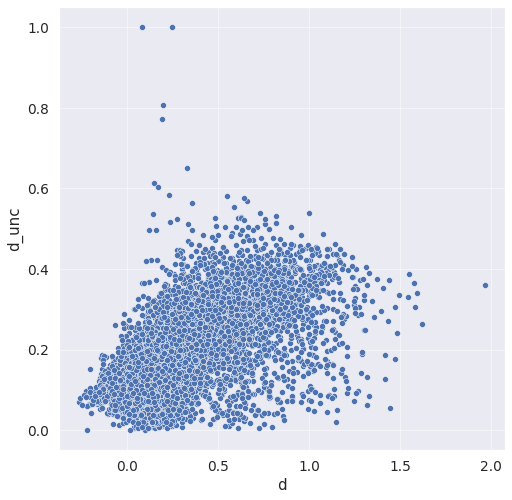

## Compare UW and 4FGL curvatures
For this comparison we determed the `fgl_comparison` parameter using a numerical second derivative
of its preferred spectral function, evaluated at the reference energy. 
This puts LP and PLEC on the same basis. (The UW curvature was determined the same way.)

<utilities.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f41add9e560>
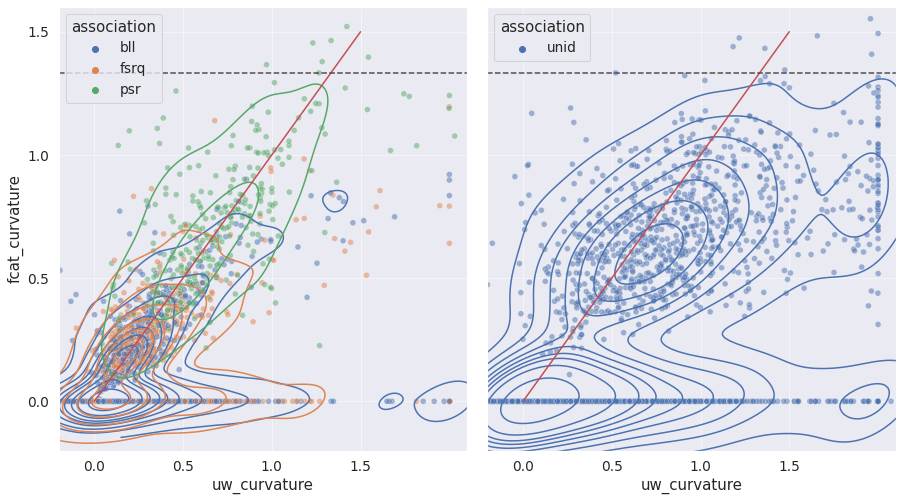

The points along the y-axis are the cases in which the preferred 4FGL spectrum is a power-law.
this happens (1215 / 2566,  881 / 2027) of the time for the twe cases.
For "ordinary" souces, left panel, the correspondence is reasonable, but for many unassociated sources the 4/3 
4FGL "4/3" prior distorts the relationship.
    

In [66]:
%run pylib/curvature
self = Curvature()
self.distributions()
self.measurments()